# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>


### What is the problem statement??<br>

For airline industry, customer experience is one of their highest priority because their revenue depends on them. Thats why highly competitive global aviation industry causes airline companies to aim for top positions, with heavy significance in customer service. Whether the customer is in the flight or at the airport, they strive to give their customers world in class experience. This is all because when a customer experiences good service from the airline they are flying with, it leaves a lasting positive image of the company on them, which helps spread the word. Also, those airlines which offers good experience in customer services, their customers tend to remain loyal to them. 
<br><br>
There's a noticeable difference in wanting to provide excellent customer experience and providing the "right" experience.
<br><br>
Mapping the customers' journey can go a long way. Here are a few examples to improve the customer experience. <br>

**Before take-off:** Customers are more inclined to taking surveys during their waiting time than post-travel. Consider cost-effective research solutions like circulating feedback forms at every stage of travel. Mobile technology can help.<br><br>
**Mid-air:** It is the best time to engage with passengers and understand their in-flight expectations. Start with the basics like seating comfort and crew etiquette.<br><br>
**Post landing:** Inspect through passengers' eyes and listen to their opinion. That's a great way to enhance your online reputation, post-flight.<br><br>

In our analysis, we will be focusing on **Before Take-off**, to update the customers with correct status of flight for their better experience.. <br>
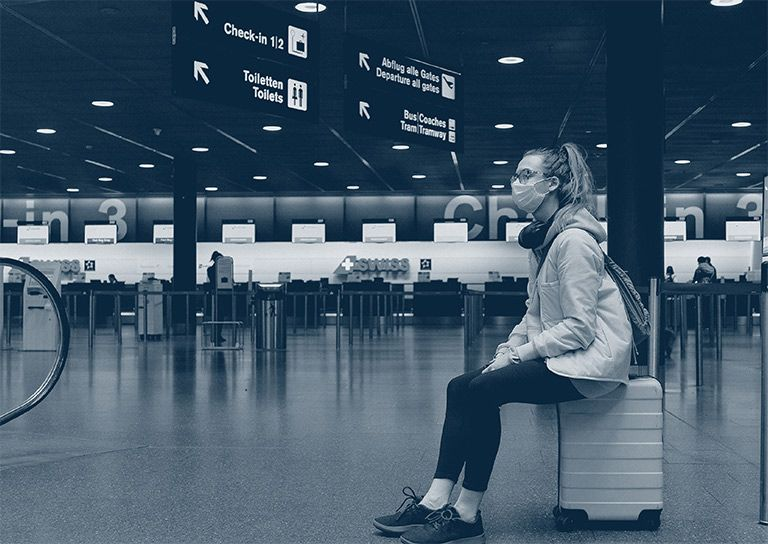

### Who are the stakeholders??
The Stakeholders interested in this analysis are the airlines such as United Airlines, Continental Airlines, Delta Airlines... So that they can serve best to their customers..

<hr>
<hr>

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

First things first, let's import the libraries which will be used in our machine learning model.
>**Pandas:**<br> 
Pandas has been one of the most commonly used tools for Machine learning, which is used for data cleaning and analysis.Based on the features available in pandas we can say pandas is best for handling data. It can handle missing data, cleaning up the data and it supports multiple file formats. This means it can read or load data in many formats like CSV, Excel, SQL, etc.
In this project, we will load CSV file using Pandas. 

>**Numpy:**<br> 
NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

>**Math:**<br> 
Python has a built-in module that we can use for mathematical tasks. The math module has a set of methods and constants used to perform mathematical operations

>**SKLearn:**<br>
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.
>>**Logistic Regression:** It is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.<br><br>
>>**KNN:** It is a Machine Learning Classification which works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).<br><br>
>>**Accuracy Score:** The accuracy_score function calculates the accuracy score for the final output we are trying to predict (target or Y) against the true outcome of the target.<br><br>
>>**ROC Curve:** AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

>**Seaborn:** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br><br>
>**Matplotlib:** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.<br><br>
>**Plotly:** The plotly library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases..<br><br>

In [1]:
# These libraries will be used to perform data analysis and mathematical operations
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import random

#These libraries will be used to build data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#If using dark background..
#plt.style.use('dark_background')

#These libraries will be used to perform our machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score 

# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

Let's first read 20 random samples of the data

In [2]:
df = pd.read_csv("FlightDelays_Clean.csv") # Defining DataFrame
filename = "FlightDelays_Clean.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 20 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df_random = pd.read_csv(filename, skiprows=skip)
df_random

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,14.50,1,0,0,0,0,0,0,0,1,214,1,0,0,0,0,0,0,0,0,0,1
1,0,20.50,1,0,0,0,0,0,0,0,1,214,1,0,0,0,0,0,1,0,0,0,0
2,0,9.00,0,1,0,0,0,0,0,0,1,214,1,0,0,0,0,0,1,0,0,0,0
3,0,14.00,0,1,0,0,0,0,0,0,1,214,1,0,0,0,0,0,0,1,0,0,0
4,1,10.50,0,0,0,0,0,1,0,1,0,169,0,0,1,0,0,0,0,0,0,0,1
5,1,10.50,0,0,0,0,0,1,0,1,0,169,0,0,1,0,0,0,0,1,0,0,0
6,0,10.50,0,0,0,0,0,1,0,1,0,169,0,0,1,0,0,0,0,0,1,0,0
7,0,9.50,0,0,0,0,0,1,0,1,0,199,1,0,0,0,0,0,0,0,1,0,0
8,0,13.00,0,0,0,0,0,1,0,1,0,213,0,1,0,0,0,0,1,0,0,0,0
9,0,7.00,0,0,0,0,0,1,0,1,0,169,0,0,1,0,0,1,0,0,0,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** status_delayed (1 if delayed, 0 otherwise)<br><br>

**Predictors**<br>
>**sch_dep_time:** The scheduled departure time of flight.<br>

>**carrier:** The name of Airline i.e Delta Airlines, US Airways, Envoy Airlines, Continental Airlines, Discovery Airlines and Others<br>

>**destination:** The destination of flight i.e John F Kennedy International Airport, Newark Liberty International Airport,LaGuardia Airport<br>

>**distance:** The distance between origin and destination of flight.<br> 

>**origin:** The origin of flight i.e Ronald Reagan Washington National Airport, Dulles International Airport,Baltimore/Washington International Thurgood Marshall Airport

>**bad weather:** Tells us if weather is bad or not.

>**day:** Tells us the day on which flight is scheduled. i.e Monday, Tuesday... etc.

>[Go to Data Prep Outline](#data-prep)
---

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

In [3]:
#Checking if duplicate values exist or any outliers.... 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status_delayed,2201.00,0.19,0.40,0.00,0.00,0.00,0.00,1.00
sch_dep_time,2201.00,13.86,4.32,6.00,10.00,14.92,17.17,21.50
carrier_delta,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
carrier_us,2201.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00
carrier_envoy,2201.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
carrier_continental,2201.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
carrier_discovery,2201.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00
carrier_other,2201.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
dest_jfk,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
dest_ewr,2201.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00


> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>
We will Include everything qs all predictors are highly correlated with our target variable<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.<br><br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>



In [4]:
#Defining our Target Variable
target = ['status_delayed']

#Defining X and Y
X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this **AFTER** splitting the data because we only want to use summary stats<br>
>**Data normalization** is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model.


In [5]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [X] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [6]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.75
1,3,0.77
2,5,0.79
3,7,0.79
4,9,0.80
5,11,0.80
6,13,0.79
7,15,0.81
8,17,0.81
9,19,0.81


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 15 as this is the lowest value that achieves the highest accuracy value<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [7]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.83
Testing data Accuracy: 0.81


>**Logistic Model:** <a class="anchor" id="second-model"></a> 
<br>
>Let's produce the same table above but this time using a Logistic Model

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.82
Testing data Accuracy: 0.82


>**Winning Model:**<a class="anchor" id="third-model"></a> 
<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

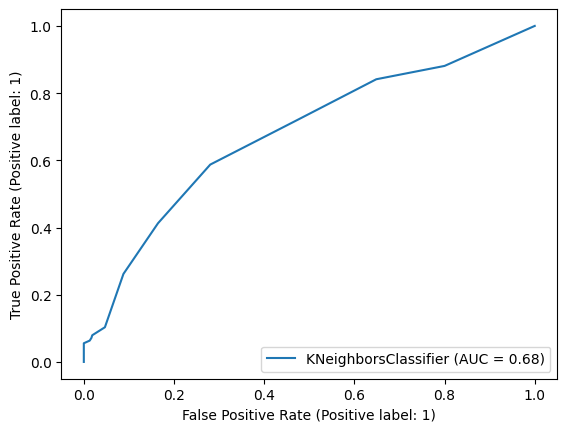

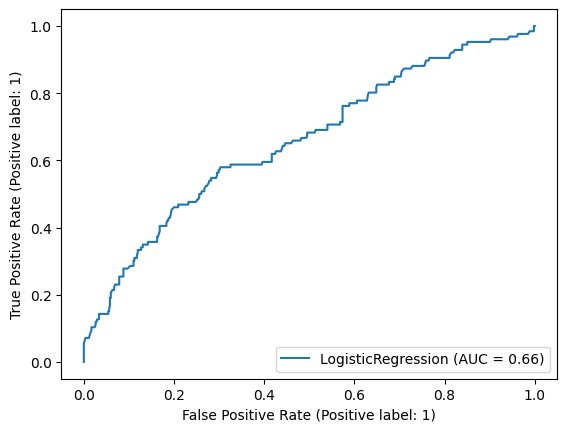

In [9]:
# ROC curve for kNN
RocCurveDisplay.from_estimator(knn, X_test, y_test)

# ROC curve for Logistic Model
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)

>**Decision Point:**<br>
AUC is highest for our **KNN** i.e 0.67,  so I will use this model to further evaluate probability thresholds and corresponding performance measures

In [10]:
#Performance of KNN model across different probablity thresholds....
class_perf_measures(knn,X_test,y_test)

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,126,0,535,0,0.19,1.00,0.19
1,0.10,106,188,347,20,0.23,0.84,0.44
2,0.20,91,280,255,35,0.26,0.72,0.56
3,0.30,52,447,88,74,0.37,0.41,0.75
4,0.40,33,488,47,93,0.41,0.26,0.79
5,0.50,10,525,10,116,0.50,0.08,0.81
6,0.60,8,528,7,118,0.53,0.06,0.81
7,0.70,7,535,0,119,1.00,0.06,0.82
8,0.80,7,535,0,119,1.00,0.06,0.82
9,0.90,7,535,0,119,1.00,0.06,0.82


In order to decide which probablity threshold we should go ahead with, we need to think about what comes the costliest for an airline while predicting the status of the flight. <br>
So, for an airline, if we are displaying a predicted value of status of fligt, **False Positive** will prove out to be much more costly, because for customer the status of flight would show as **'Delayed'**, but the flight actually will be **'On Time'**. This might cause chaos for customers when they arrive at airport late, but as soon as they reach there are chances that they might miss the flight. And as discussed above, customer experience whether on flight or at the airport is utmost priority for airlines, so such cases can leave bad impression on the airline and might be that those customers switch to a different airlines when they are travelling the next time, <br>
On the other hand, False negative would be relatively less costly, because for customer, the status of flight would show **On Time** but in actual it would be **Delayed**.... Which is fine because customers can wait at the airport for the flight... <br>
False negative only starts being costlier when the delay time starts crossing 12 hours, because in such cases, the airline industry needs to arrange accomodation for their customers in expensive hotels and also take care of their food expense..
<br>
So, in a nutshell we are much more concerned here about **Precision**.

1. **Prob Threshold = 0.2**:<br>
|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  284                                          | 251                              |
| **1**    	                |  35                                           | 91                               |


So, the confusion matrix above shows 251 cases as flase positive, which is **Huge**. Thats why precision is only **27 %**. This might leave really bad repution on the airline.. <br>
On the other hand, False negative which are 35 cases are low which will work with the best interests of the airline.. But we need to select different threshold because of high False positives... Lets move on.. 

<br><br>
2. **Prob Threshold = 0.4**:

|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  488                                          | 47                               |
| **1**    	                |  93                                           | 33                               |


So, Now the confusion matrix above shows only 47 False positive cases, which is **pretty low** then the one at threshold of **0.2**, Thats why our precision has improved to **47 %**. This also means that in most of the cases customers will be updated if the flight is **On Time**.. <br>
On the other hand, False negative cases are also relatively lower i.e 93.. So airlines will not incur huge losses in arranging accomodation and food for the customers waiting for their flight over 12 hours... 

<br><br>
3. **Prob Threshold = 0.6**:

|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  528                                          | 7                                |
| **1**    	                |  119                                          | 7                                |

So, Now the confusion matrix above shows only 7 False positive cases, which is **very very low** and **good for us**, Also our target metric **Precision** is at high at **50%**. We should definetly choose this probablity threshold in order for the bestest customer experience... <br>
But But But.. Our False negative cases have increased to their highest **199**.. This means that it might silently turn into a nightmare because now lots of customers have to wait for their flight at airport and in cases like flight getting delayed for more than 12 hours, it would cause great inconvenience for customers and also as an airline, your costs to cover accomodation and food expenses of customer will be **terribly high**.. 
<br><br>

**So which threshold we should go ahead with???**<br>
Hence, we will go ahead with probablity threshold of **0.4**, because it the finds out the best intermediate way between False positive and False Negative.. This threshold will make sure that most of the customers are updated if the flight is **On Time** and on the other hand, as an airline the cost to cover accomodation and food expenses of customers whose flight get delays for more than 12 hours will be **lower** and also, mostly customers will not get bad experience waiting for the flight.. 

>[Go to Machine Learning Outline](#ml-model)
---



# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>


* [Go to Top](#table-of-content)
<br>

>**pickle_out** is a new object that allows to WRITE BINARY (wb) to a new file called 'classifier'<br>
once completed, we'll find this new file in the same folder as our Jupyter Notebook

>**pickle.dump()** translates our model functionality (as defined above) into binary and loads it into the pickle_out object...which, by extension, dumps everything into the new file "classifier"<br>

>**pickle_out.close()** is simply shutting down the pickle operation.

<hr>

> Streamlit is a great tool to create beautiful data applications quite easily but when it comes to deploying them and making them accessible, we should make sure that our data is secured. Because protecting data from internal or external corruption and illegal access protects a company from financial loss, reputational harm, consumer trust degradation, and brand erosion.<br>

In [11]:
X = df.iloc[:,1:len(df.columns)] 
y = df.iloc[:,0]
knn.fit(X,y)
predictions = knn.predict(X)
print(accuracy_score(y,predictions)) 

0.8119036801453885


In [12]:
import pickle
pickle_out = open('classifier', mode='wb')                      # We are creating a new object called 'pickle_out'.  
                                                                # This object contains a new file called 'classifier'
                                                                # and this is in 'write' mode.  And we are opening 
                                                                # it to write 'binary' to it (wb).
            
pickle.dump(knn, pickle_out)                                  # use the pickle library to 'export' or 'translate' our 
                                                                # previously created ML model object ('model') into the
                                                                # binary 'classifier' file created in the code 
                                                                # immediately preceding this line.
            
pickle_out.close()                                              # close the pickle object now that we've written our 
                                                                # Python to it.

>  - The '''**writefile app.py**''' lets us output code developed in our Notebook to a Python module.<br>
>  - In second line, we imported **pickle library** to implement the binary protocol.<br>
>  - In the third line, we imported **streamlit** library, Streamlit helps us create web apps for machine learning models in a short time, you can also customize the web apps. <br><br>
>  - Then, we will define our function 'prediction' which will take inputs from the data we enter in the model, and will return us the prediction. 
>  - Finally, In the end, we launch streamlit which will help us work with our model on a webpage. 

In [13]:
%%writefile app.py

import pickle
import streamlit as st
# this function will add a new background image on the Streamlit web app of our choice. 
def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://res.allmacwallpaper.com/get/iMac-21-inch-wallpapers/Prediction-background-1920x1080/1713-9.jpg");
             background-attachment: fixed;
             -webkit-background-size: cover;
             -moz-background-size: cover;
             -o-background-size: cover;
            background-size: cover;
            height:100%;
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url() 

pickle_in = open('classifier', 'rb')
classifier = pickle.load(pickle_in)

@st.cache()

# Defining the function - prediction() which will make the prediction using data
# inputs from users.

def prediction(sch_dep_time,carrier_delta,
carrier_us,
carrier_envoy,
carrier_continental,
carrier_discovery,
carrier_other,
dest_jfk,
dest_ewr,
dest_lga,
distance,
origin_dca,
origin_iad,
origin_bwi,
bad_weather,
Monday,
Tuesday,
Wednesday,
Thursday,
Friday,
Saturday,
Sunday):
    
    # Making prediction based on the inputs received from the users.
    prediction = classifier.predict(
        [[sch_dep_time,carrier_delta,
carrier_us,
carrier_envoy,
carrier_continental,
carrier_discovery,
carrier_other,
dest_jfk,
dest_ewr,
dest_lga,
distance,
origin_dca,
origin_iad,
origin_bwi,
bad_weather,
Monday,
Tuesday,
Wednesday,
Thursday,
Friday,
Saturday,
Sunday]])
    
    if prediction == 0:
        pred = 'This Flight is not likely to delay'
    else:
        pred = 'Warning! This Flight might delay'
    return pred

# This is the main function in which we define our webpage
def main():
    
    st.title("Flight Delay Predictor")
    st.write("Please enter the Details below:")
    st.sidebar.title("Sidebar")
    threshold = st.sidebar.slider("Threshold", min_value=0.00, max_value=1.0, step=0.01, value=0.5)
    col1, col2,col3,col4,col5 = st.columns(5)
    # Creating the input fields
    with col1:
        st.subheader("Other Details")
        
        sch_dep_time = st.number_input("Enter Scheduled Departure Time",
                          min_value=0,
                          max_value=24,
                          value=0,
                          step=1
                         )
        distance = st.number_input("Enter Distance between airports",
                          min_value=1,
                          max_value=10000,
                          value=200,
                          step=1
                         )
        bad_weather = st.number_input("Is Weather Bad?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    with col2:
        st.subheader("Carrier Info")
        carrier_delta = st.number_input("Is Carrier Delta Airlines? (0,1)",
                                  min_value=0,
                                  max_value=1,
                                  value=0,
                                  step=1
                                 )
        carrier_us = st.number_input("Is Carrier US Airways? (0-1)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )

        carrier_envoy = st.number_input("Is Carrier Envoy Air?(0-1)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )
        carrier_continental = st.number_input("Is Carrier Continental Airlines?(0-1)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )
        carrier_discovery = st.number_input("Is Carrier Discovery Airways?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        carrier_other = st.number_input("Is Carrier any other airline then the one's mentioned above? (0,1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    with col3:
        st.subheader("Destination Info")
        dest_jfk = st.number_input("Is Destination John F Kennedy International Airport?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        dest_ewr = st.number_input("Is Destination Newark Liberty International Airport?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        dest_lga = st.number_input("Is Destination LaGuardia Airport?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    with col4:
        st.subheader("Origin Info")
        origin_dca = st.number_input("Is Origin Ronald Reagan Washington National Airport?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        origin_iad = st.number_input("Is Origin Dulles International Airport?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        origin_bwi = st.number_input("Is Origin Baltimore/Washington International Thurgood Marshall Airport?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    with col5:
        st.subheader("Day Info")
        Monday = st.number_input("Is Day Monday?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        Tuesday = st.number_input("Is Day Tuesday?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        Wednesday = st.number_input("Is Day Wednesday?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        Thursday = st.number_input("Is Day Thursday?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        Friday = st.number_input("Is Day Friday?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        Saturday = st.number_input("Is Day Saturday?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        Sunday = st.number_input("Is Day Sunday?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )

    result = ""
    

    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(sch_dep_time,carrier_delta,
carrier_us,
carrier_envoy,
carrier_continental,
carrier_discovery,
carrier_other,
dest_jfk,
dest_ewr,
dest_lga,
distance,
origin_dca,
origin_iad,
origin_bwi,
bad_weather,
Monday,
Tuesday,
Wednesday,
Thursday,
Friday,
Saturday,
Sunday)
        
        st.success(result)
        
if __name__=='__main__':
    main()

Overwriting app.py


In [ ]:
!streamlit run app.py                                                 # Launching the Streamlit web app!! We are all set :D 